In [3]:
from __future__ import division, print_function, unicode_literals

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import time
import re
import math
from docx import Document

# import packages for data visulatzation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# modeling routines from Scikit Learn packages for model develipment
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix , accuracy_score , classification_report, make_scorer,recall_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import regularizers

# obtain precision, recall, F1, and support metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# specify the set of classifiers being evaluated
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

import warnings
warnings.filterwarnings("ignore")
# set KMP_DUPLICATE_LIB_OK=TRUE      #  Windows
# set up randam seed
random_seed = 55
import tensorflow as tf
import torch
import platform

from sklearn.impute import KNNImputer
import pickle
df_input = pd.read_csv("E:/CNSI_project/demo_and_data_5.0/aim1_dataset_v2.1.csv")

In [4]:
model_data_CNN = df_input.copy()
model_data_CNN = model_data_CNN.dropna(thresh=(model_data_CNN.shape[1]-1)*0.4, axis=0)
print(model_data_CNN.culture.value_counts())
model_data_CNN

0    9016
1     245
Name: culture, dtype: int64


,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity,culture
0,NaN,NaN,0.7,92.0,NaN,NaN,NaN,3.7,144.0,11.7,...,NaN,NaN,NaN,100.0,NaN,0.0,NaN,NaN,NaN,0
1,NaN,3.6,0.6,95.0,NaN,NaN,187.0,3.7,137.0,12.6,...,NaN,NaN,NaN,43.0,2.0,17.0,NaN,NaN,NaN,0
2,NaN,2.6,1.2,76.0,NaN,NaN,NaN,4.9,137.0,9.7,...,NaN,NaN,NaN,41.0,49.0,10.0,16.0,13.0,2.0,0
3,NaN,NaN,0.8,105.0,NaN,NaN,NaN,3.9,142.0,15.3,...,NaN,NaN,NaN,62.0,NaN,0.0,NaN,NaN,NaN,0
4,NaN,4.9,1.0,111.0,12.0,2.0,NaN,4.6,128.0,8.4,...,0.77,0.4,45.3,96.0,NaN,1.0,19.0,9.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9307,NaN,NaN,0.8,155.0,NaN,NaN,NaN,3.6,137.0,11.6,...,NaN,NaN,NaN,0.0,NaN,100.0,NaN,NaN,NaN,0
9308,NaN,NaN,0.7,140.0,NaN,NaN,180.0,3.7,140.0,13.0,...,NaN,NaN,NaN,1.0,NaN,90.0,NaN,NaN,NaN,0
9309,NaN,2.3,0.7,53.0,NaN,NaN,NaN,3.8,135.0,10.7,...,NaN,NaN,NaN,88.0,NaN,8.0,NaN,NaN,NaN,0
9310,99.0,3.4,0.8,87.0,8.0,5.0,453.0,3.9,145.0,11.0,...,0.83,0.4,53.9,55.0,NaN,9.0,NaN,NaN,NaN,0


In [5]:
df_train, df_test = train_test_split(model_data_CNN, test_size=0.2, random_state = random_seed, stratify=model_data_CNN['culture'])

In [6]:
# Null Fill
columns1 = df_train.columns
index1 = df_train.index
columns2 = df_test.columns
index2 = df_test.index

imputer = KNNImputer(n_neighbors=5, weights='distance')
df_train = imputer.fit_transform(df_train)
df_test = imputer.transform(df_test)

# Save the imputer as a pickle file for easy recall later.
with open("E:/CNSI_project/demo_and_data_5.0/Processed_data/StandardPickleFiles/imputer_KNNImputer_aim1_CNN.pickle","wb") as f:
    pickle.dump(imputer, f)

# change to DataFrame
df_train = pd.DataFrame(df_train, columns=columns1, index=index1)
df_train['culture'] = df_train['culture'].astype(np.int16)
df_test = pd.DataFrame(df_test, columns=columns2, index=index2)
df_test['culture'] = df_test['culture'].astype(np.int16)

df_train

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity,culture
8307,180.679727,2.800000,0.500000,179.00000,6.369960,0.803958,307.000000,3.500000,140.000000,10.1,...,0.512608,0.746807,46.731750,38.368055,18.778440,16.577489,18.276368,8.155022,2.000000,0
2678,183.000000,3.914459,0.800000,108.00000,13.912882,1.000000,295.382367,3.600000,144.000000,11.2,...,1.472264,0.416355,52.000000,74.000000,12.494797,2.000000,14.000000,0.000000,2.000000,1
6610,91.074126,3.200000,0.400000,86.00000,44.494718,0.848094,423.000000,3.600000,144.000000,12.8,...,0.420079,0.531425,42.155551,83.000000,10.710489,0.000000,18.246785,3.820149,2.170156,0
3342,103.282251,3.900000,0.800000,92.00000,6.656718,0.775131,384.000000,3.300000,133.000000,11.9,...,0.628558,0.411935,45.436615,65.000000,22.418171,27.000000,22.363155,8.763695,2.000000,0
1265,108.726684,3.663107,0.800000,100.00000,39.000000,1.000000,290.636866,4.200000,138.000000,13.1,...,0.210000,0.300000,43.100000,59.000000,17.851303,0.000000,17.645869,6.990370,1.811949,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233,87.936798,4.000000,0.743751,87.07808,33.406454,0.847706,182.394249,3.810988,140.685815,14.1,...,0.410000,0.267669,41.300000,95.000000,6.367661,0.000000,16.483255,8.983928,2.383124,0
7191,108.125296,4.321744,0.700000,93.00000,38.870145,0.603819,146.000000,3.400000,138.000000,11.6,...,0.455004,0.368282,41.195930,88.000000,2.715292,0.000000,17.381080,7.201144,2.559746,0
8446,118.000000,4.300000,1.200000,146.00000,26.005633,0.524025,197.000000,4.200000,137.000000,14.4,...,1.370184,0.743711,48.581520,41.000000,40.135793,0.000000,17.588375,6.216954,1.942370,0
1953,99.443162,3.397163,0.500000,121.00000,6.715108,0.634386,283.913009,4.900000,139.000000,12.2,...,0.585460,0.532059,47.095414,10.000000,50.000000,40.000000,18.629608,9.953452,2.026580,0


In [7]:
df_test

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity,culture
5720,89.850229,4.483348,1.0,101.00000,35.793566,1.040517,217.192425,4.000000,139.000000,14.9,...,0.826256,0.365723,42.672964,84.0,12.458538,0.0,16.322731,3.634950,2.377419,0
4424,114.000000,3.900000,0.9,104.85895,29.523877,0.588764,331.000000,4.388984,134.341068,13.2,...,0.904637,0.397485,43.443387,54.0,27.637346,1.0,16.788864,3.522559,2.114023,0
4368,85.000000,3.800000,0.5,104.00000,5.951567,0.803855,253.055520,3.300000,140.000000,9.6,...,0.750169,0.514931,46.669824,68.0,2.270093,1.0,17.052479,4.391601,2.150569,0
8425,155.458851,4.600000,1.0,98.00000,40.000000,0.000000,180.432777,4.700000,140.000000,13.3,...,0.730000,0.300000,41.400000,63.0,20.674130,3.0,16.620283,5.274110,2.439258,0
3948,106.622059,3.931320,1.7,99.00000,25.000000,2.000000,276.681195,4.200000,139.000000,14.3,...,0.940000,0.500000,42.200000,0.0,53.713746,0.0,17.205597,3.275473,2.380744,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,103.463114,3.972587,2.1,91.00000,35.511099,0.625630,320.793071,4.800000,140.000000,9.8,...,0.409297,0.293448,45.789607,65.0,35.000000,0.0,18.646590,5.868761,2.645428,1
2026,170.000000,4.100000,1.3,96.00000,14.207802,0.643374,277.000000,3.400000,145.000000,10.6,...,0.959468,0.413238,42.956397,39.0,4.449361,50.0,16.858512,5.337583,2.481463,0
1178,184.146689,4.400000,0.7,105.00000,446.000000,0.000000,208.957255,7.300000,138.000000,13.2,...,0.410000,0.400000,41.900000,71.0,17.710989,3.0,18.000000,2.000000,2.000000,0
1440,101.910145,4.203328,0.6,113.00000,9.000000,1.000000,182.346621,3.700000,137.000000,14.5,...,0.385310,0.408995,43.500000,91.0,3.000000,0.0,16.000000,2.000000,2.000000,0


In [8]:
df_train.culture.value_counts()

0    7212
1     196
Name: culture, dtype: int64

In [9]:
df_test.culture.value_counts()

0    1804
1      49
Name: culture, dtype: int64

In [10]:
from sklearn.utils import class_weight
def calc_class_weight(total_y):
    my_class_weight = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(total_y), y=total_y)
    return my_class_weight

In [11]:
my_class_weight = calc_class_weight(model_data_CNN['culture'].values.tolist())
my_class_weight

array([ 0.51358696, 18.9       ])

In [12]:
my_class_weight = {0:my_class_weight[0], 1:my_class_weight[1]}
my_class_weight

{0: 0.5135869565217391, 1: 18.9}

In [13]:
# my_class_weight = {0:1, 1:1}
# my_class_weight

In [14]:
# generate X subsets for Modelling 
X_train = df_train.iloc[:,:-1]
X_test = df_test.iloc[:,:-1]
print(X_train.shape, X_test.shape)

(7408, 26) (1853, 26)


In [15]:
# generate Y subsets for Modelling 
y_train = df_train.iloc[:,-1:]
y_test = df_test.iloc[:,-1:]
y_train.shape, y_test.shape

((7408, 1), (1853, 1))

In [16]:
# method 1
# MinMaxScaler normalization

# scaler = MinMaxScaler()
# X_train= scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# print(X_train.shape, X_test.shape)
# X_train[:2]

In [17]:
# method 2
# StandardScaler normalization
# Data normalisation leads to less volatility during training

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Save the scaler as a pickle file for later recall.
with open("E:/CNSI_project/demo_and_data_5.0/Processed_data/StandardPickleFiles/StandardScaler_aim1_CNN.pickle","wb") as f:
    pickle.dump(scaler, f)

X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape)
X_train[:2]

(7408, 26) (1853, 26)


array([[ 0.96061996, -2.07471254, -0.52798052,  1.19818918, -0.41335525,
        -0.04759455,  0.00490088, -0.96544993,  0.24902937, -0.72774716,
        -0.8670837 , -1.65294573, -0.89217008, -1.09227278,  0.20822515,
         2.18760826, -0.1548008 , -0.62761449,  0.22129243, -0.04011687,
        -0.64174525,  0.36742903, -0.00612003,  0.34793803,  1.12647198,
        -0.32976301],
       [ 1.00335615,  0.2285039 , -0.22534712, -0.28852917, -0.26035887,
         0.29268804, -0.03968022, -0.78402109,  1.19155302, -0.24083598,
         0.03526955, -0.63688685, -0.18837204, -0.48495373, -0.20506174,
        -0.11520329, -0.08251003,  2.30280935, -0.58986204,  0.77705322,
         0.50174049, -0.11240737, -0.53553387, -1.97199587, -1.65534944,
        -0.32976301]])

In [18]:
# CNN
# K-fold verification
# develip Neural Network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten,AveragePooling1D, MaxPooling1D
n_cols = X_train.shape[1]
# kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)
def build_model():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(n_cols, 1)))
    model.add(MaxPooling1D(pool_size=3))
#     model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
#     model.add(AveragePooling1D(pool_size=2))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    # model.summary()
    model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])
    return model

In [19]:
num_epochs = 100
k = 4
num_val_samples = X_train.shape[0] // k
all_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i*num_val_samples : (i+1)*num_val_samples]
    val_targets = y_train[i*num_val_samples : (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate([X_train[:i * num_val_samples], X_train[(i+1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples], y_train[(i+1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data = (val_data, val_targets),
                       epochs = num_epochs, batch_size = 64, verbose = 0, class_weight=my_class_weight)
    all_histories.append(history.history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [20]:
average_loss = [np.mean([x['loss'][i] for x in all_histories]) for i in range(num_epochs)]
average_accuracy = [np.mean([x['accuracy'][i] for x in all_histories]) for i in range(num_epochs)]

average_val_loss = [np.mean([x['val_loss'][i] for x in all_histories]) for i in range(num_epochs)]
average_val_accuracy = [np.mean([x['val_accuracy'][i] for x in all_histories]) for i in range(num_epochs)]

In [21]:
gap = 1
n = int(num_epochs/gap)

loss_gap10 = [np.average(average_loss[gap*i:gap*(i+1)]) for i in range(n)]
acc_gap10 = [np.average(average_accuracy[gap*i:gap*(i+1)]) for i in range(n)]

val_loss_gap10 = [np.average(average_val_loss[gap*i:gap*(i+1)]) for i in range(n)]
val_acc_gap10 = [np.average(average_val_accuracy[gap*i:gap*(i+1)]) for i in range(n)]

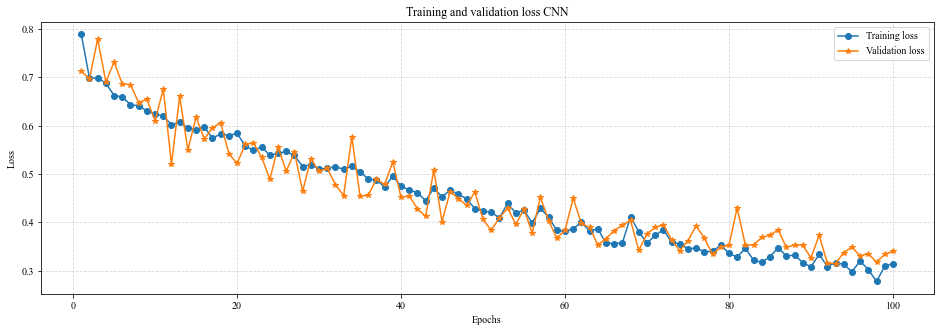

In [22]:
epochs = [each*gap for each in range(1, 1+n)]

plt.figure(figsize = (16,5))
plt.clf() 
plt.plot(epochs, loss_gap10, 'o-', label='Training loss')
plt.plot(epochs, val_loss_gap10, '*-', label='Validation loss')
plt.title('Training and validation loss CNN')
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plt.savefig('./image/CNN_loss_standardization.jpg', dpi=300, bbox_inches='tight')
# plt.tight_layout()

plt.show()

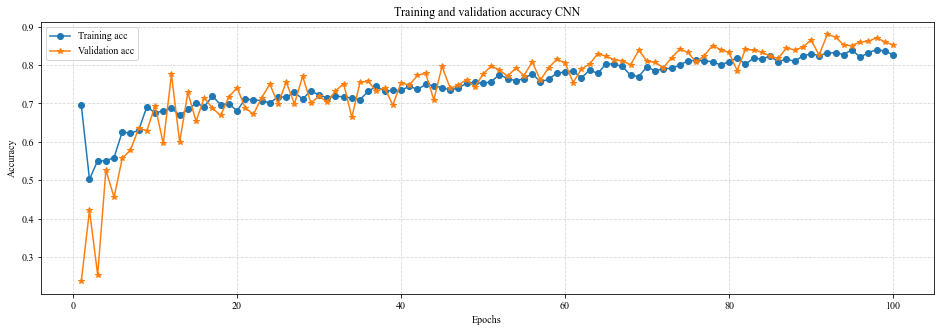

In [23]:
plt.figure(figsize = (16,5))
# plt.grid(axis="y")
plt.plot(epochs, acc_gap10, 'o-', label='Training acc')
plt.plot(epochs, val_acc_gap10, '*-', label='Validation acc')
plt.title('Training and validation accuracy CNN')
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# plt.savefig('./image/CNN_accuracy_standardization.jpg', dpi=300, bbox_inches='tight')
# plt.tight_layout()

plt.show()

In [3325]:
# Combining the two graphs above shows that the accuracy is highest at epoch=92 or so.
model = build_model()
model.fit(X_train, y_train, epochs = 92, batch_size = 64, verbose = 1, class_weight=my_class_weight)

Epoch 1/20
117/117 [==============================] - 1s 8ms/step - loss: 0.7531 - accuracy: 0.6123
Epoch 2/20
117/117 [==============================] - 1s 6ms/step - loss: 0.7011 - accuracy: 0.5814
Epoch 3/20
117/117 [==============================] - 1s 6ms/step - loss: 0.6954 - accuracy: 0.5304
Epoch 4/20
117/117 [==============================] - 1s 6ms/step - loss: 0.6772 - accuracy: 0.6028
Epoch 5/20
117/117 [==============================] - 1s 6ms/step - loss: 0.6954 - accuracy: 0.5541
Epoch 6/20
117/117 [==============================] - 1s 5ms/step - loss: 0.6605 - accuracy: 0.6773
Epoch 7/20
117/117 [==============================] - 1s 5ms/step - loss: 0.6852 - accuracy: 0.6256
Epoch 8/20
117/117 [==============================] - 1s 5ms/step - loss: 0.6577 - accuracy: 0.6341
Epoch 9/20
117/117 [==============================] - 0s 4ms/step - loss: 0.6612 - accuracy: 0.6043
Epoch 10/20
117/117 [==============================] - 1s 4ms/step - loss: 0.6333 - accuracy: 0.6847

In [3326]:
# save model
# model.save()

In [19]:
# load model
# from tensorflow.keras.models import load_model
# model = load_model('E:/CNSI_project/demo_and_data_5.0/models_test/1131/CNN_0.8398004434589801_0.7346938775510204_1131.h5')

# CNN Evaluation

In [20]:
model.evaluate(X_test, y_test)

58/58 [==============================] - 4s 6ms/step - loss: 0.4939 - accuracy: 0.8370


[0.4938688576221466, 0.8370210528373718]

In [21]:
y_predict = model.predict(X_test)
y_predict

58/58 [==============================] - 0s 2ms/step


array([[0.7672765 , 0.23272353],
       [0.63012505, 0.36987492],
       [0.60269046, 0.39730954],
       ...,
       [0.87120825, 0.12879175],
       [0.72143924, 0.27856073],
       [0.6441397 , 0.35586035]], dtype=float32)

In [22]:
y_test

,culture
5720,0
4424,0
4368,0
8425,0
3948,0
...,...
2753,1
2026,0
1178,0
1440,0


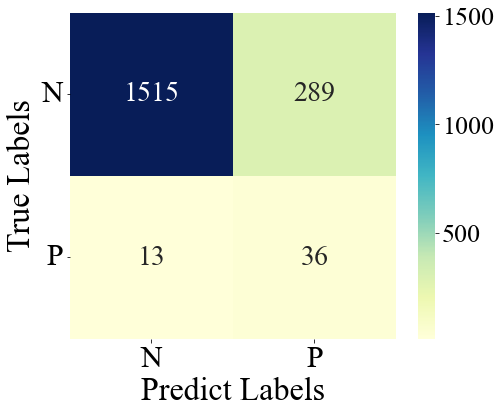

In [23]:
# generate confusion matrix
labels1 = ["N", "P"]
plt.figure(figsize = (8, 6))
cm = confusion_matrix(y_test.values,y_predict.argmax(axis=1))
ax = sns.heatmap(cm, square=True, annot=True , cmap="YlGnBu", annot_kws={"fontsize":28}, fmt=".0f")   #square=True, annot=True showing number
# plt.matshow(cm)
# plt.title('Confusion matrix CNN', fontsize=18)
plt.ylabel("True Labels", fontsize=32)
plt.xlabel("Predict Labels", fontsize=32)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=26)

# plt.colorbar()
plt.xticks([i + 0.5 for i in range(len(labels1))], labels1, rotation = 0, fontsize=30)
plt.yticks([i + 0.5 for i in range(len(labels1))], labels1, rotation = 0, fontsize=30)

# plt.savefig('./image/Confusion_matrix_standardization_cnn1.jpg', dpi=300, bbox_inches='tight')
# plt.tight_layout()

plt.show()

In [21]:
cm

array([[1515,  289],
       [  13,   36]], dtype=int64)

In [22]:
predict_matrix = np.zeros(cm.shape)
for i in range(cm.shape[0]):
    temp = np.sum(cm[i])
    for j in range(cm.shape[1]):
        predict_matrix[i,j] = cm[i,j]/temp
predict_matrix

array([[0.83980044, 0.16019956],
       [0.26530612, 0.73469388]])

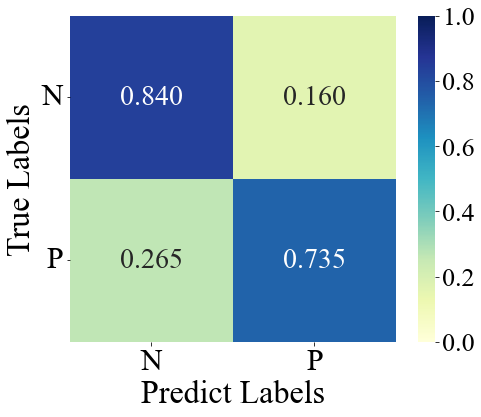

In [23]:
plt.figure(figsize = (8, 6))
ax = sns.heatmap(predict_matrix, square=True, annot=True ,cmap="YlGnBu", annot_kws={"fontsize":28}, fmt=".3f", vmin=0, vmax=1)
plt.xticks([i + 0.5 for i in range(len(predict_matrix))], labels1, rotation = 0, fontsize=30)
plt.yticks([i + 0.5 for i in range(len(predict_matrix))], labels1, rotation = 0, fontsize=30)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=26)

# plt.title('Confusion matrix of prediction', fontsize=18)
plt.ylabel("True Labels", fontsize=32)
plt.xlabel("Predict Labels", fontsize=32)

# plt.savefig('./image/Confusion_matrix_standardization_cnn2.jpg', dpi=300, bbox_inches='tight')
# plt.tight_layout()

plt.show()

In [24]:
# calculate evaluation metric using test cohort
accuracy0 = np.round(accuracy_score(y_test.values, 
               y_predict.argmax(axis=1)), decimals = 3)
print('\nCNN Predictive Accuracy: ',accuracy0)


CNN Predictive Accuracy:  0.837


In [25]:
print('\nSummary of CNN Precision and Recall\n') 
print(classification_report(y_test, y_predict.argmax(axis=1), 
                            target_names = labels1, digits=3))


Summary of CNN Precision and Recall

              precision    recall  f1-score   support

           N      0.991     0.840     0.909      1804
           P      0.111     0.735     0.193        49

    accuracy                          0.837      1853
   macro avg      0.551     0.787     0.551      1853
weighted avg      0.968     0.837     0.890      1853



In [26]:
from sklearn.metrics import confusion_matrix

y_true = np.array(y_test).flatten()
y_true = y_true.astype(int)
y_pred = y_predict.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

# The weights for each class
weights = np.bincount(y_true) / len(y_true)

# Weighted average sensitivity and specificity
weighted_avg_sensitivity = np.sum(weights * np.array([TPR, TNR]))
weighted_avg_specificity = np.sum(weights * np.array([TNR, TPR]))

print('Weighted avg sensitivity:', weighted_avg_sensitivity)
print('Weighted avg specificity:', weighted_avg_specificity)

Weighted avg sensitivity: 0.73747327405911
Weighted avg specificity: 0.8370210469508905


In [27]:
from sklearn.metrics import confusion_matrix

y_true = np.array(y_test).flatten()
y_true = y_true.astype(int
y_pred = y_predict.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

# Sensitivity, hit rate, recall, or true positive rate
sensitivity = TP/(TP+FN)
# Specificity or true negative rate
specificity = TN/(TN+FP) 

print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 0.7346938775510204
specificity: 0.8398004434589801


In [28]:
y_predict

array([[0.7672765 , 0.23272353],
       [0.63012505, 0.36987492],
       [0.60269046, 0.39730954],
       ...,
       [0.87120825, 0.12879175],
       [0.72143924, 0.27856073],
       [0.6441397 , 0.35586035]], dtype=float32)

In [29]:
y_test

,culture
5720,0
4424,0
4368,0
8425,0
3948,0
...,...
2753,1
2026,0
1178,0
1440,0


In [30]:
y_predict.argmax(axis=1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

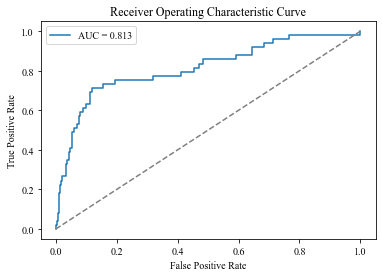

In [31]:
# Calculate AUC score and plot ROC curve
from sklearn.metrics import roc_curve, auc,roc_auc_score

# fpr, tpr, thresholds = roc_curve(label_true.ravel(), label_predict.ravel())
# auc = auc(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_test, y_predict[:,1])
auc = roc_auc_score(y_test, y_predict[:,1])

plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

# AUPRC、C-index and Brier Score

FCN AUPRC: 0.154
Baseline (positive class ratio): 0.026


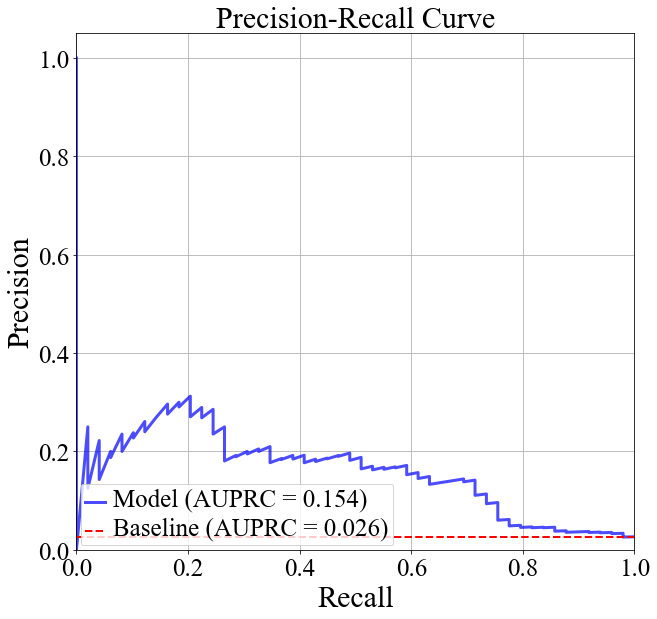

In [32]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, brier_score_loss
from lifelines.utils import concordance_index

# AUPRC
precision, recall, _ = precision_recall_curve(y_test, y_predict[:,1])
auprc = auc(recall, precision)
print(f'FCN AUPRC: {auprc:.3f}')

baseline = y_test.culture.value_counts()[1] / len(y_test)
print(f'Baseline (positive class ratio): {baseline:.3f}')

plt.figure(figsize=(10, 9.5))
plt.plot(recall, precision, color='blue', label=f'Model (AUPRC = {auprc:.3f})', linewidth=3, alpha=0.7)

plt.axhline(y=baseline, color='red', linestyle='--', label=f'Baseline (AUPRC = {baseline:.3f})', linewidth=2)

plt.xlabel('Recall', fontsize=30, fontname='Times New Roman')
plt.ylabel('Precision', fontsize=30, fontname='Times New Roman')
plt.title('Precision-Recall Curve', fontsize=30, fontname='Times New Roman')

legend = plt.legend(loc='lower left')
for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    text.set_fontsize(25)

plt.grid()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=25, fontname='Times New Roman')
plt.yticks(fontsize=25, fontname='Times New Roman')

plt.show()


In [33]:
# C-index
# C-index is often used for survival analysis, but can also be used for classification tasks to measure the consistency of the model for survival or event ordering.
# For binary classification tasks, you can simply use the concordance_index function in lifelines.utils.
c_index = concordance_index(y_test, y_predict[:,1])
print(f'FCN C-index: {c_index:.3f}')

FCN C-index: 0.813


In [34]:
# Brier Score 
# Measures the mean square error between the model's predicted probability and the actual outcome.
brier_score = brier_score_loss(y_test, y_predict[:,1])
print(f'FCN Brier Score: {brier_score:.3f}')

FCN Brier Score: 0.153
